# Домашнее задание №2

SQL-инъекция (SQLi) представляет собой одну из наиболее распространенных и опасных уязвимостей веб-приложений. Она возникает, когда злоумышленник вставляет вредоносные SQL-запросы в поля ввода пользовательских данных. Эти запросы могут позволить злоумышленнику получить несанкционированный доступ к базе данных, извлечь, изменить или удалить данные, а в некоторых случаях даже получить контроль над сервером.

Обнаружение и предотвращение SQL-инъекций крайне важно, поскольку такие атаки могут нанести значительный ущерб как бизнесу, так и пользователям. Традиционные методы защиты включают использование параметризованных запросов, подготовленных выражений и тщательную проверку и экранирование входных данных. Однако, несмотря на эти меры, уязвимости все же могут возникать из-за ошибок в программировании или человеческого фактора.

С развитием технологий машинного обучения (ML) появились новые подходы к обнаружению и предотвращению SQL-инъекций. Методы машинного обучения позволяют анализировать большие объемы данных и выявлять аномалии или подозрительные шаблоны, указывающие на попытку внедрения вредоносного SQL-запроса. Системы, основанные на ML, могут обучаться на исторических данных и адаптироваться к новым видам атак, что делает их мощным инструментом для обеспечения безопасности веб-приложений.

## Описания задания

В данном задании мы постараемся изучить возможность детектирования SQL-инъекций на основе подхода обработки естественного языка (NLP) к анализу данных. Современные методы NLP позволяют эффективно обрабатывать и анализировать текстовые данные, выявляя закономерности и аномалии, которые могут ускользнуть от традиционных методов защиты.

Используя инструменты и методы NLP, мы будем анализировать текстовые входные данные веб-приложений, чаще всего передаваемый в полезной нагрузки прикладных протоколов, чтобы обнаружить подозрительные паттерны, характерные для SQL-инъекций. Это включает в себя такие техники, как токенизация (`RegexpTokenizer`), векторизация текста (`TfidfVectorizer`, `CountVectorizer`), предобработка данных (отброс несущественных токенов на основе анализа главных компонент),обучение моделей классификации.

В рамках работы вам предоставлено два размеченных датасета (`train-dataset.tsv` и `test-dataset.csv`)  с полезной нагрузкой в виде текста и метки 0 (легитимный текст) и 1 (payload содержащий sql инъекцию) 

Для выполнения домашнего задания вам необходимо:
1. Предустановить зависимости:
```shell
$ pip install -r requirements.txt
```
2. Загрузить исходный датасет `train-dataset.tsv` при помощи модуля `pandas` и разбить его на обучающий и тестовый набор данных: 
```python
source_df = pd.read_csv("datasets/train-dataset.tsv", sep='\t', engine='python')
df_train, df_test = train_test_split(source_df, test_size=0.5)
x_train, y_train = df_train['payload'].values, df_train['label'].values
x_test, y_test = df_test['payload'].values, df_test['label'].values
```

3. Извлечь токенезировать и векторизировать данные представленные в `train-dataset.tsv` при помощи инструментов `nltk.tokenize.RegexpTokenizer`, `sklearn.feature_extraction.text.TfidfVectorizer`, `sklearn.feature_extraction.text.CountVectorizer`

4. Выбрать ключевые, наиболее значемые токены при помощи инструментов `sklearn.feature_selection.SelectFromModel` и `sklearn.decomposition.TruncatedSVD`

5. Обучить модель на выбранных ключевых признаках

6. Протестировать обученную модель на тестовых данных из набора `train-dataset.tsv`

7. Подсчитать accuracy, построить матрицу ошибок

8. Загрузить тестовый датасет `test-dataset.tsv` при помощи модуля `pandas`:

9. Протестировать предобученную модель на новом наборе данных

10. Подсчитать accuracy, построить матрицу ошибок

11. Рассмотреть различные модели классификации, а также различные способы векторизации и токенизации данных, сравнить полученные результаты между собой

## Теоретический материал

Процесс машинного обучения моделей классификации позволяющих обнаруживать SQL инъекции можно свести к следующим этапам: 

#### 1. Предварительная обработка данных

Основная цель предварительной обработки данных — подготовить текстовые данные для дальнейшего анализа. Это включает следующие шаги:

- Токенизация: Разбиение текста на отдельные слова или фразы (токены).
- Очистка текста: Удаление лишних символов, знаков препинания, стоп-слов и приведение слов к нижнему регистру.
- Лемматизация или стемминг: Приведение слов к их начальной или базовой форме для уменьшения количества уникальных слов.


**RegexpTokenizer** (регулярный токенизатор) — это инструмент для разбиения текста на токены (слова или фразы) с использованием регулярных выражений. Регулярные выражения позволяют задавать сложные шаблоны для поиска и извлечения нужных частей текста.

#### 2. Векторизация данных

Наиболее простым споосбом векторизации является `CountVectorizer`:

`CountVectorizer` — это инструмент для преобразования текста в числовые векторы путем подсчета количества вхождений каждого слова в документ. В результате каждый документ представляется как вектор, где каждая позиция соответствует определенному слову, а значение в позиции — количество вхождений этого слова в документе.

Пример:

Документ 1: "SELECT * FROM users"
Документ 2: "DROP TABLE users"
Векторизация: [1, 1, 1, 0, 0] и [0, 0, 0, 1, 1]
где каждая позиция соответствует слову(токену) из словаря: ["SELECT", "*", "FROM", "DROP", "TABLE"].

Другим способом векторизации является `TfidfVectorizer`:

`TfidfVectorizer` (Term Frequency-Inverse Document Frequency Vectorizer) — это инструмент обработки текста, используемый для преобразования текстовых данных в числовые векторы на основе значимости слов. Этот метод учитывает как частоту появления слова в документе (term frequency, TF), так и обратную частоту появления слова во всех документах коллекции (inverse document frequency, IDF).

- TF (term frequency): измеряет частоту появления слова в документе. Обычно рассчитывается как отношение количества вхождений слова к общему количеству слов в документе: tf(t, d) = f(t, d) / sum(f(t', d) for t' in d)
- IDF (inverse document frequency): измеряет, насколько редким или распространенным является слово в коллекции документов. Рассчитывается как логарифм отношения общего количества документов к количеству документов, содержащих данное слово: idf(t) = log(N / df(t))

- Итоговый вес токена: tf-idf(t, d) = tf(t, d) * log(N / df(t))

#### 3. Отбор токенов (Отбор признаков)

Отбор токенов (или признаков) является важным шагом, который позволяет уменьшить размерность данных, улучшить производительность модели и избежать переобучения. Для этого используются различные методы, включая статистические и алгоритмические подходы:

- `SelectFromModel`: Метод для отбора признаков, основанный на важности признаков, которую определяет обученная модель. Например, можно использовать Lasso (линейная модель с L1-регуляризацией) для оценки важности признаков.

- `TruncatedSVD`: Метод понижения размерности, который применим к разреженным матрицам, например, к тем, которые получены с помощью `CountVectorizer` или `TfidfVectorizer`. `TruncatedSVD` уменьшает размерность данных, сохраняя наиболее важную информацию.

Также возможно комбинация данных методов, для повышения точности отбора признаков.

#### 4. Обучение модели

После векторизации текстовых данных их можно использовать для обучения моделей машинного обучения. Основные шаги включают:

- Разделение данных: Разделение данных на тренировочные и тестовые наборы.
- Выбор модели: Выбор алгоритма машинного обучения, такого как логистическая регрессия, случайный лес, метод опорных векторов (SVM) или нейронные сети.
- Обучение модели: Обучение модели на тренировочных данных с использованием векторизованных текстов.
- Оценка модели: Оценка точности и эффективности модели на тестовых данных с помощью метрик, таких как точность, полнота, F-мера.

#### 5. Обнаружение SQL-инъекций

После обучения модель можно использовать для классификации новых входных данных. При поступлении нового ввода текстовые данные проходят через этапы предварительной обработки и векторизации, после чего обученная модель определяет, является ли ввод подозрительным на наличие SQL-инъекций.
Преимущества подхода на основе NLP

- Адаптивность: Модели машинного обучения могут адаптироваться к новым типам атак, обучаясь на новых данных.
- Автоматизация: Системы на основе NLP могут автоматически анализировать и классифицировать большое количество входных данных, что повышает эффективность обнаружения уязвимостей.
- Точность: Использование методов векторизации, таких как TF-IDF, позволяет учитывать контекст и значимость слов, что улучшает точность классификации.

Использование методов NLP и машинного обучения для обнаружения SQL-инъекций представляет собой современный и эффективный подход, способный значительно повысить уровень безопасности веб-приложений. 

## Описание лабораторного стенда

#### Описание `FeatureExtractor` 
`FeatureExtractor` — класс, отвечающий за извлечение признаков (токенизацию и векторизацию данных) из исходных датафреймов. Имеет два метода:

`fit_extract` — анализирует предоставленные тексты и строит внутренние структуры данных, такие как словарь терминов (слов) и их IDF (inverse document frequency, обратная частота документа) значения. IDF вычисляется как логарифм отношения общего количества документов к количеству документов, содержащих данный термин, после чего преобразует текстовые данные в векторное представление на основе вычисленных векторов TF-IDF;

`extract_features` — выполняет только преобразование входных текстовых данных в соответствующие вектора TF-IDF с использованием уже обученных внутренних структур, таких как словарь терминов и IDF значения.

`FeatureExtractor` — поддерживает следующие режимы работы:

* TF-IDF ('tf-idf'):

    Описание: TF-IDF (Term Frequency-Inverse Document Frequency) — это метод вычисления веса слова в документе относительно его важности в коллекции документов.
    Применение: Каждый документ представляется в виде вектора, где каждая компонента отражает вес термина (слова), вычисленный по формуле TF-IDF. Этот метод учитывает и частоту встречаемости слова в документе (TF) и обратную частоту документа (IDF).
    Пример: Используется для извлечения ключевых признаков из текста, что полезно для задач, таких как классификация текстов, кластеризация и информационный поиск.

* TF-IDF с N-граммами ('tf-idf_ngram'):

    Описание: Этот режим также использует TF-IDF, но включает векторизацию не только отдельных слов, но и последовательностей из N смежных слов (N-грамм).
    Применение: Учитывает контекстуальные зависимости между последовательными словами, что может улучшить качество представления текста, особенно для задач, где важен порядок слов, например, в задачах машинного перевода или анализе sql запросов.

* Мешок слов ('bag_of_words'):

    Описание: Это простой метод векторизации, который представляет каждый документ в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного слова из словаря.
    Применение: Подходит для задач, где важно только наличие слова в тексте, а не его частота или важность. Обычно используется в моделях, требующих быстрое обучение и простоту интерпретации, таких как методы наивного Байеса или простые линейные модели.

* Мешок символов ('bag_of_characters'):

    Описание: Этот метод представляет текст в виде вектора, где каждая компонента соответствует наличию или отсутствию конкретного символа в тексте.
    Применение: Полезен в задачах, где важны структура или последовательность символов, таких как распознавание рукописного текста или анализ кодов программ. 

#### Описание `FeatureSelecter`
`FeatureSelecter` — класс, реализующий отбор ключевых токенов из общего набора. Отбор производится двумя комбинацией двух методов: SelectFromModel(Lasso) и TruncatedSVD.

`fit_transform` — Обучает SelectFromModel и TruncatedSVD модели на тренировочных данных. Преобразует тренировочные данные с использованием обученных моделей. Возвращает преобразованные тренировочные данные.

`transform` — выполняет только отбор токенов на основе работы предобученных моделей.


#### Описание `ModelFabric` 
`ModelFabric` — класс, предоставляющий единый интерфейс для создания моделей классификации данных

Поддерживает создание следующих моделей:
* XGBOOST
* SVC
* NU_SVC
* KNEIGHBORS
* DECISION_TREE
* RANDOM_FOREST
* ADABOOST
* BAGGING
* EXTRA_TREES
* LINEAR_SVC

In [23]:
import time
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [2]:
class ExtractMethods:
    TF_IDF = 'tf-idf'
    TF_IDF_NGRAM = 'tf-idf_ngram'
    BAG_OF_WORDS = 'bag_of_words'
    BAG_OF_CHAR = 'bag_of_characters'
    

class FeatureExtractor:
  def __init__(self, method, *args, **kwargs):
    self.args = args
    self.kwargs = kwargs
    self.notes = {}
    self.vectorizer = self._get_vectorizer(method, args, kwargs)

  def _get_vectorizer(self, method, *args, **kwargs):
    token = RegexpTokenizer(r'[a-zA-Z0-9]+')
    match method:
      case ExtractMethods.TF_IDF:
          return TfidfVectorizer(tokenizer = token.tokenize, *self.args, **self.kwargs)
      case ExtractMethods.TF_IDF_NGRAM:
          return TfidfVectorizer(
            lowercase=True, stop_words='english', 
            ngram_range = (1, 3),
            tokenizer = token.tokenize, analyzer='char'
          )
      case ExtractMethods.BAG_OF_WORDS:
          return CountVectorizer(analyzer='word',  **self.kwargs)
      case ExtractMethods.BAG_OF_CHAR:
          return CountVectorizer(analyzer='char', tokenizer = token.tokenize, **self.kwargs)
      case _:
          raise ValueError(f"Unknown feature extraction method: {self.method}")


  def fit_extract(self, x_train):
      return self.vectorizer.fit_transform(x_train)

  def extract_features(self, x):
      return self.vectorizer.transform(x)    

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [6]:
class FeatureSelecter:
    def __init__(self, n_components):
        self._scaler = StandardScaler(with_mean=False)
        self._lasso_selecter = SelectFromModel(Lasso(alpha=0.001, random_state=10))
        self._pca = TruncatedSVD(n_components=n_components)

    def fit_transform(self, x_train, y_train):
        self._scaler.fit(x_train)
        self._lasso_selecter.fit(self._scaler.transform(x_train), y_train)
        self._pca.fit(self._lasso_selecter.transform(self._scaler.transform(x_train)))
        
        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x_train)))
    
    def transform(self, x):
        return self._pca.transform(self._lasso_selecter.transform(self._scaler.transform(x)))

In [3]:
import xgboost as xgb
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
class Models:
    XGBOOST = 'XGBoost'
    SVC = 'SVC'
    NU_SVC = 'NuSVC'
    KNEIGHBORS = 'KNeighbors'
    DECISION_TREE = 'DecisionTree'
    RANDOM_FOREST = 'RandomForest'
    ADABOOST = 'AdaBoost'
    BAGGING = 'Bagging'
    EXTRA_TREES = 'ExtraTrees'
    LINEAR_SVC = 'LinearSVC'


class ModelFabric:
    @staticmethod
    def create_model(model_name, *args, **kwargs):
        match model_name:
            case Models.XGBOOST:
                return xgb.XGBClassifier(*args, **kwargs)
            case Models.SVC:
                return SVC(gamma=2, C=1, *args, **kwargs)
            case Models.NU_SVC:
                return NuSVC(*args, **kwargs)
            case Models.KNEIGHBORS:
                return KNeighborsClassifier(3, *args, **kwargs)
            case Models.DECISION_TREE:
                return DecisionTreeClassifier(max_depth=5, *args, **kwargs)
            case Models.RANDOM_FOREST:
                return RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, *args, **kwargs)
            case Models.ADABOOST:
                return AdaBoostClassifier( *args, **kwargs)
            case Models.BAGGING:
                return BaggingClassifier(*args, **kwargs)
            case Models.EXTRA_TREES:
                return ExtraTreesClassifier(*args, **kwargs)
            case Models.LINEAR_SVC:
                return LinearSVC(*args, **kwargs)
            case _:
                raise ValueError(f"Unsupported model name: {model_name}")

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_confusion_matrix(y_expect, y_pred):
    cm = confusion_matrix(y_expect, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Normal','SQL-Injection'], yticklabels=['Normal','SQL-Injection'])
    plt.xlabel('Prediction',fontsize=13)
    plt.ylabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()

In [8]:
source_df = pd.read_csv("datasets/train-dataset.tsv", sep='\t', engine='python')
df_train, df_test = train_test_split(source_df, test_size=0.5)
x_train, y_train = df_train['payload'].values, df_train['label'].values
x_test, y_test = df_test['payload'].values, df_test['label'].values

In [9]:
feature_extractor = FeatureExtractor(ExtractMethods.TF_IDF_NGRAM)
x_train = feature_extractor.fit_extract(x_train)

/home/vladgud/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/vladgud/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/home/vladgud/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:560: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [10]:
# x_train = feature_extractor.extract_features(x_train)
x_test = feature_extractor.extract_features(x_test)
print(x_test.shape)

(15305, 22695)


In [12]:
feature_selecter = FeatureSelecter(1500)
selected_x_train = feature_selecter.fit_transform(x_train, y_train)
selected_x_test = feature_selecter.transform(x_test)

In [13]:
model = ModelFabric.create_model(Models.XGBOOST, max_depth=2, n_estimators=50)

In [14]:
model.fit(selected_x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [15]:
y_pred = model.predict(selected_x_test)

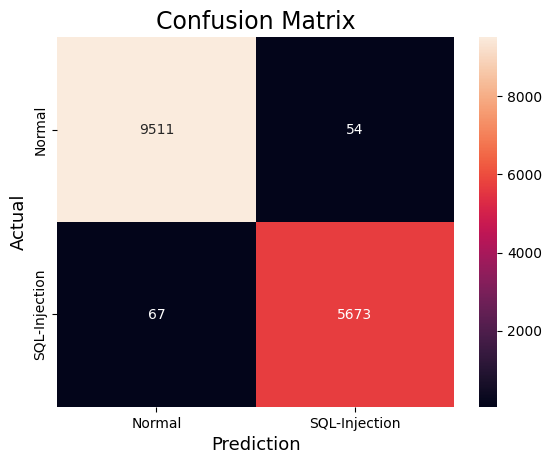

Accurancy: 0.992094086899706


In [16]:
plot_confusion_matrix(y_test, y_pred)
print("Accurancy:", accuracy_score(y_test, y_pred))

In [17]:
estimate_df = pd.read_csv("datasets/test-dataset.csv")
x_estimate, y_estimate = estimate_df['payload'].values, estimate_df['label'].values

In [18]:
print(estimate_df)

       Unnamed: 0                                            payload  label
0               0                                     c/ caridad s/n      0
1               1                                       campello, el      0
2               2                                              40184      0
3               3                                   1442431887503330      0
4               4                                              nue37      0
...           ...                                                ...    ...
30151       30151  1') and extractvalue(7982,concat(0x5c,0x717170...      1
30152       30152                                    1" order by 1--      1
30153       30153  1' procedure analyse(extractvalue(5840,concat(...      1
30154       30154  1 rlike (select * from (select(sleep(5)))sgvo)...      1
30155       30155  -7511)) as xqzf where 9939=9939 union all sele...      1

[30156 rows x 3 columns]


In [19]:
x_estimate = feature_extractor.extract_features(x_estimate)
print(x_estimate.shape)

(30156, 22695)


In [20]:
selected_x_estimate = feature_selecter.transform(x_estimate)
print(selected_x_estimate.shape)

(30156, 1500)


In [21]:
y_pred = model.predict(selected_x_estimate)

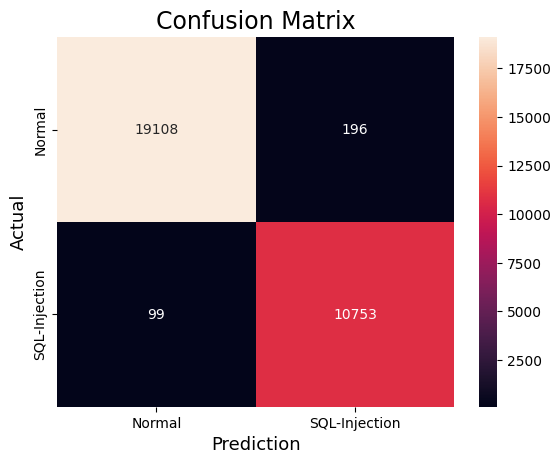

Accurancy: 0.9902175354821594


In [22]:
plot_confusion_matrix(y_estimate, y_pred)
print("Accurancy:", accuracy_score(y_estimate, y_pred))